In [1]:
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
import sklearn 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
import sys

import warnings
warnings.filterwarnings('ignore')

print('python', '%s.%s.%s' % sys.version_info[:3])

for mod in np, sns, sklearn, pd:
    print(mod.__name__, mod.__version__)

python 3.12.4
numpy 1.26.4
seaborn 0.13.2
sklearn 1.4.2
pandas 2.2.2


In [4]:
dataset = pd.read_csv("/Users/mrityunjay/Downloads/Identifying male or female based on voice using XGBoost and ML/voice_data.csv")
dataset.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
dataset.shape

(3168, 21)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [7]:
dataset.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [8]:
dataset.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [9]:
print("Total number of labels : ", format(dataset.shape[0]))

Total number of labels :  3168


In [10]:
print("Total number of Males : ", format(dataset[dataset.label == "male"].shape[0]))
print("Total number of Females : ", format(dataset[dataset.label == "female"].shape[0]))

Total number of Males :  1584
Total number of Females :  1584


Correlation among Features

In [12]:
data = pd.read_csv("/Users/mrityunjay/Downloads/Identifying male or female based on voice using XGBoost and ML/voice_data.csv")
corr = data.drop(columns = 'label', axis = 1).corr()

<Axes: >

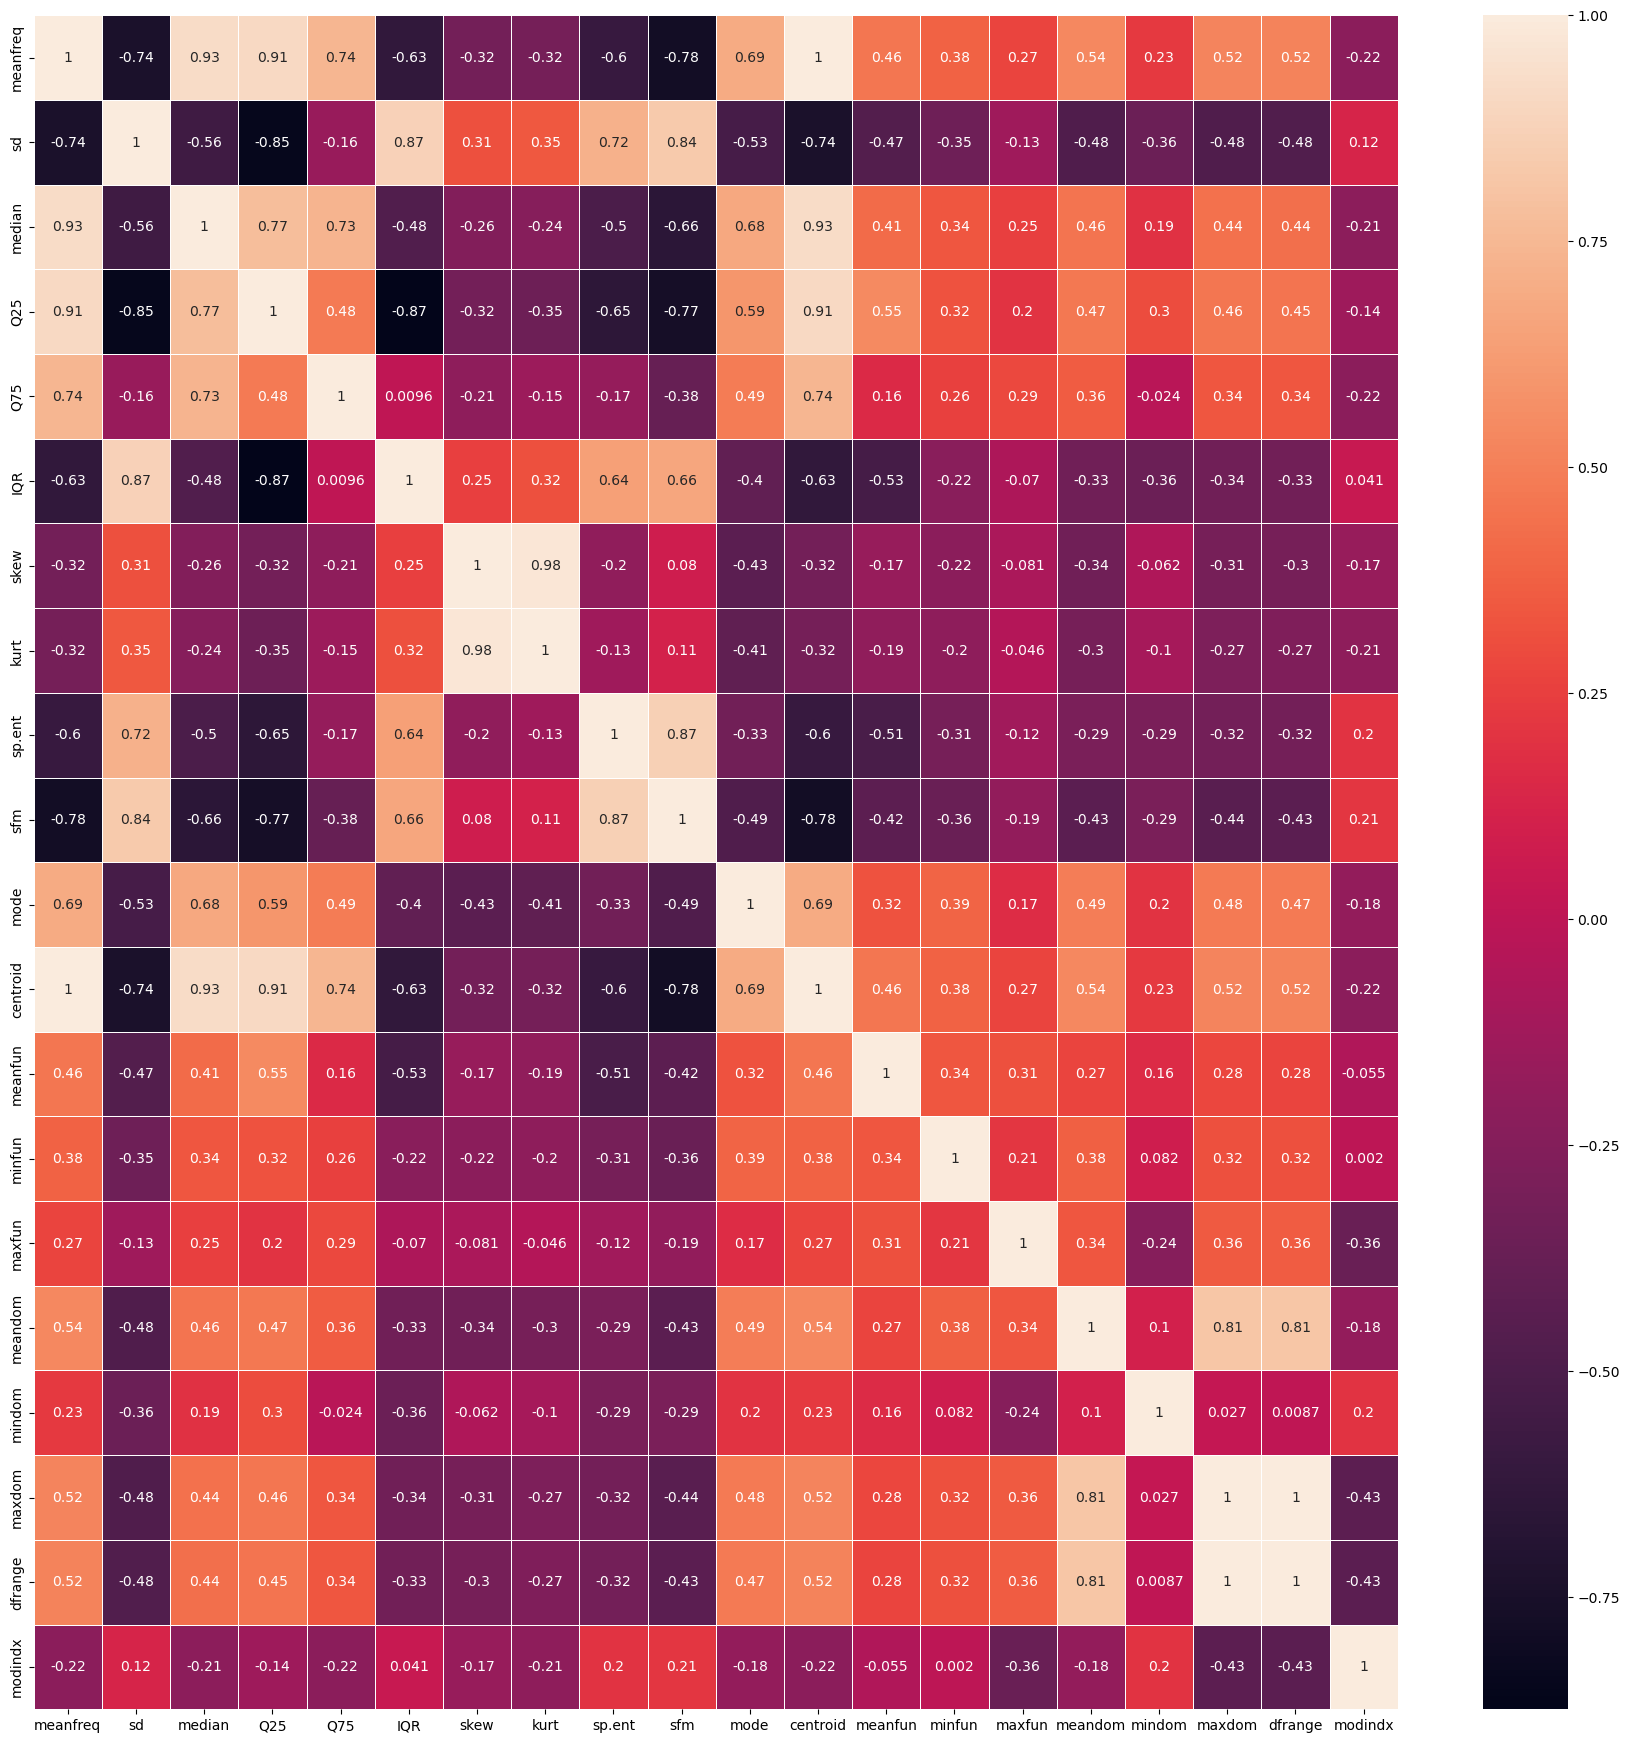

In [13]:
plt.figure(figsize = (22, 22))
sns.heatmap(corr, annot = True, linewidth = 0.5)

### Kernel Density Estimate Plot 
#### It is analagous to a histogram. It represents the data using a continuous probability density curve.

In [15]:
label_encode = LabelEncoder()
data['label'] = label_encode.fit_transform(data['label'])
print(data.head())

   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  

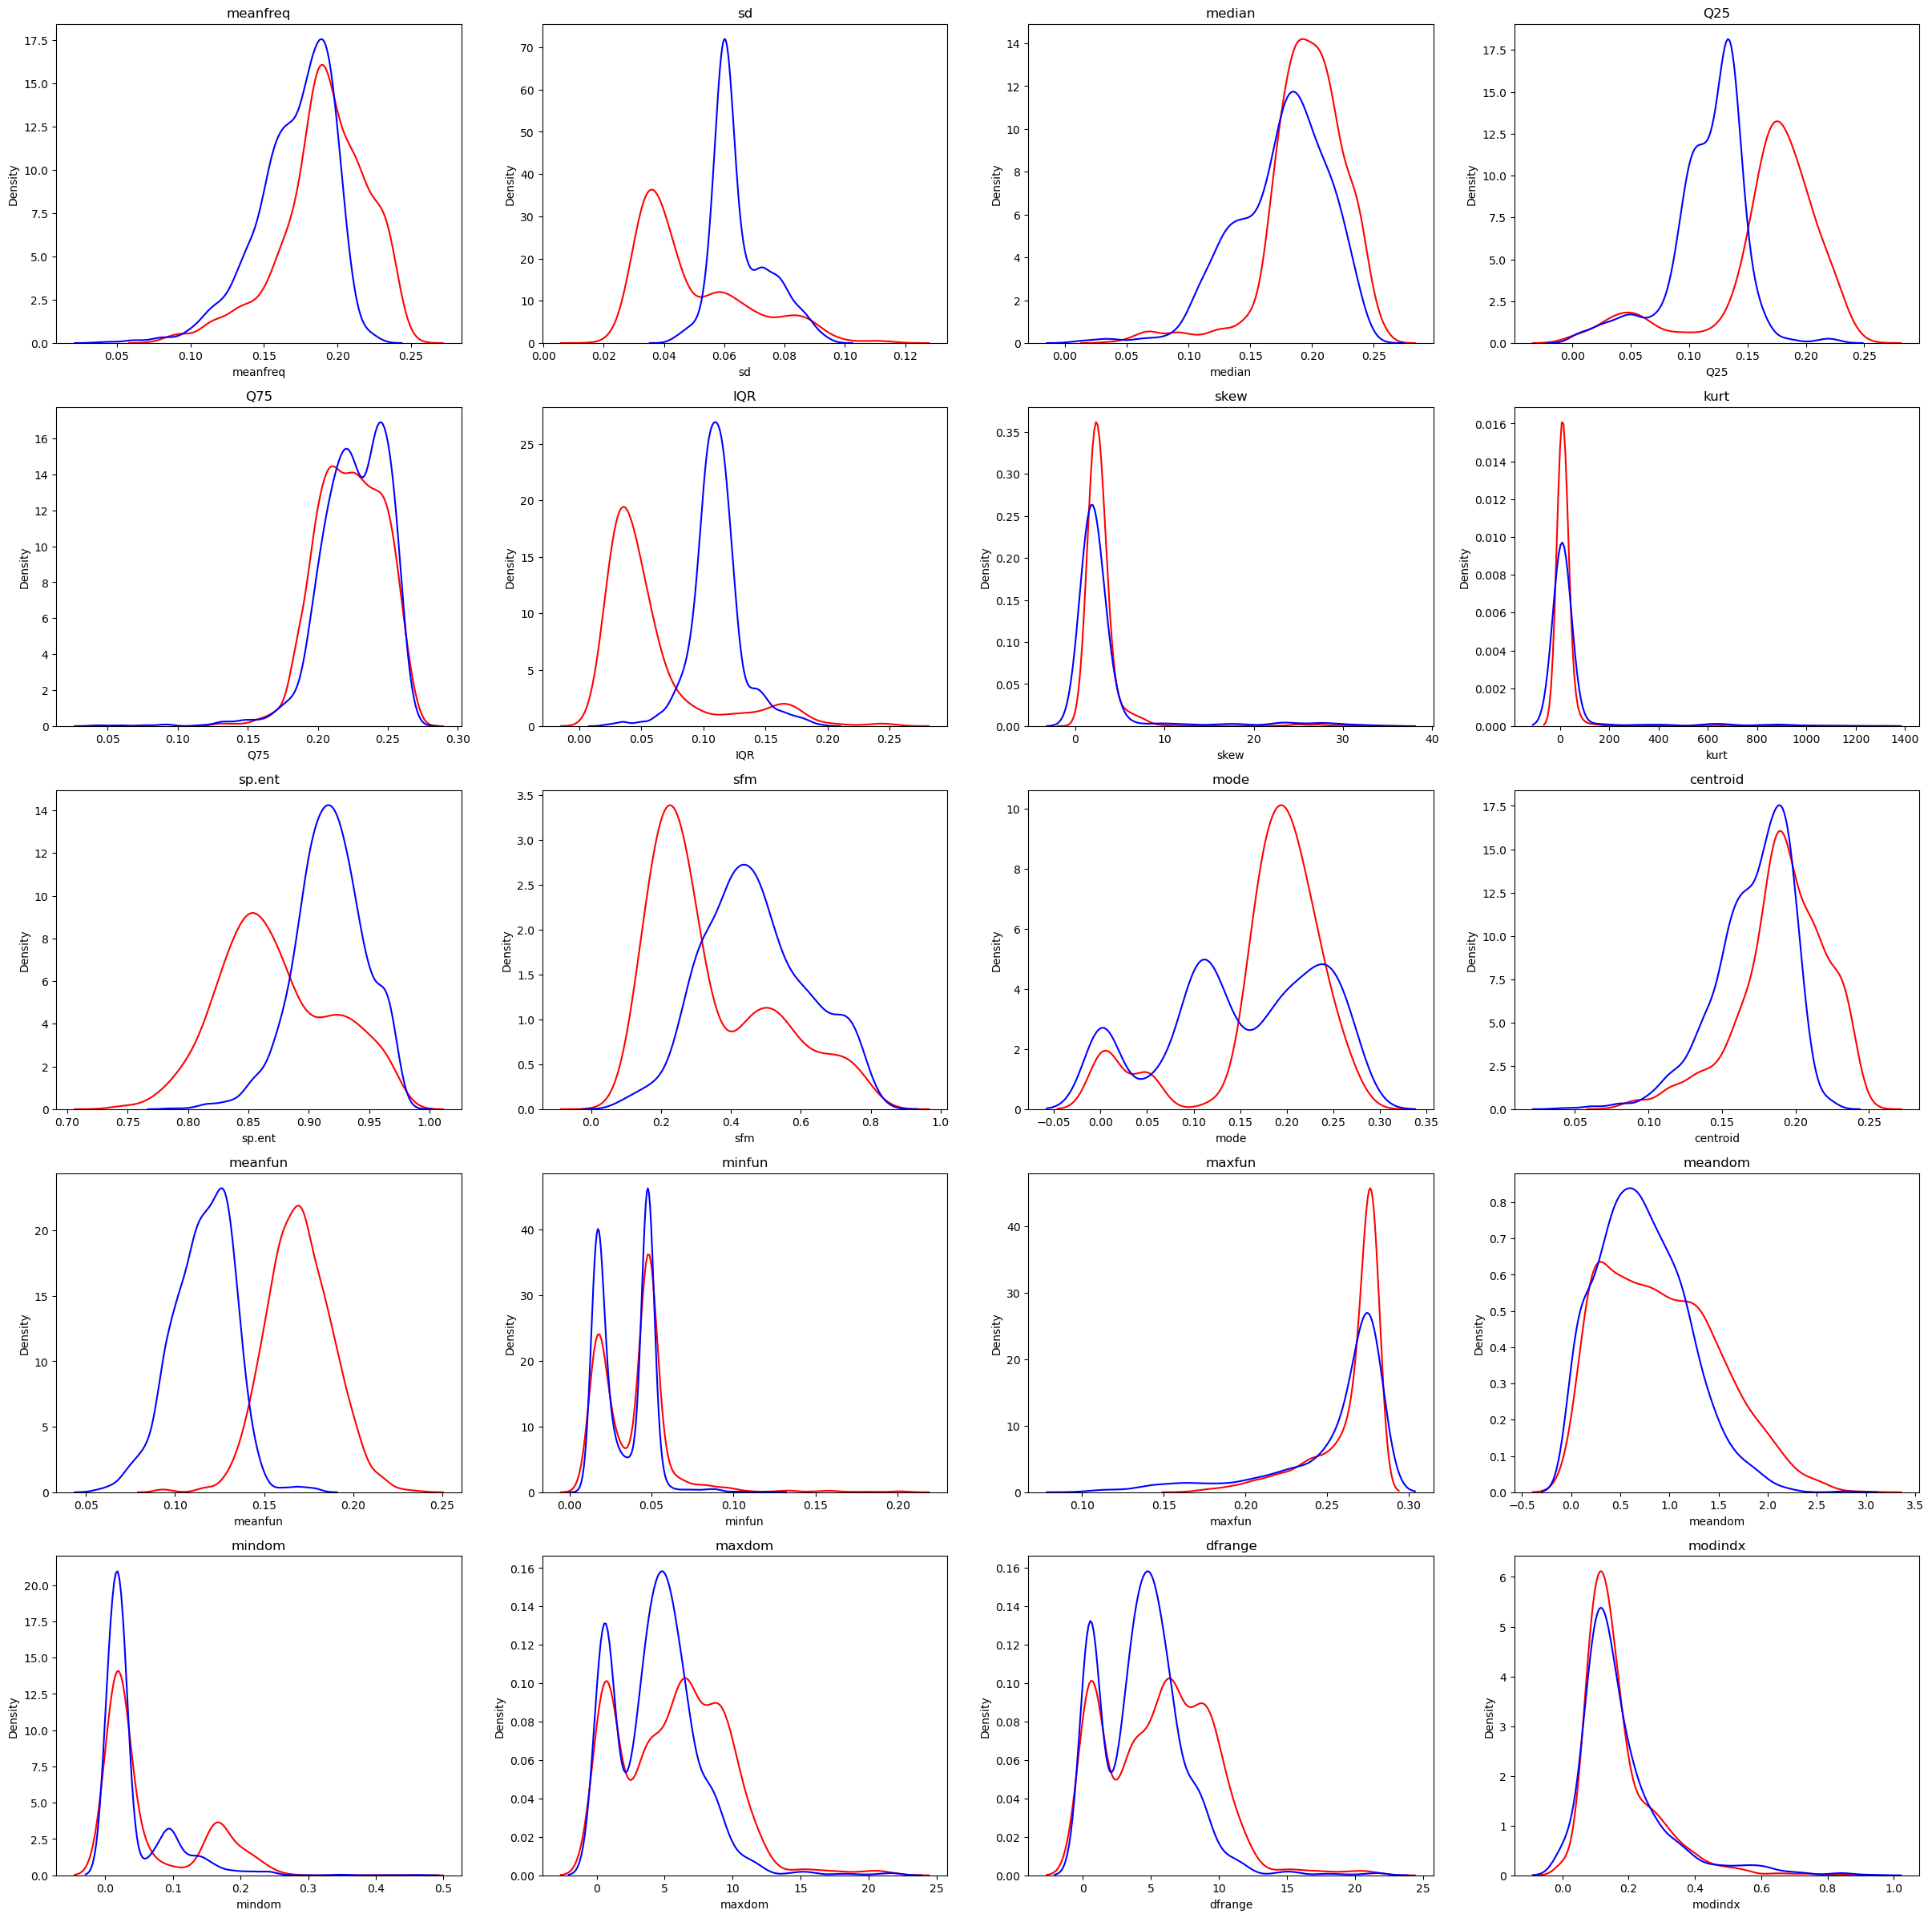

In [16]:
plt.subplots(5,4,figsize=(30, 30))
for i in range(1,21):
    plt.subplot(5,4,i)
    plt.title(data.columns[i-1])
    sns.kdeplot(data.loc[data['label'] == 0, data.columns[i-1]], color= 'red', label='female')
    sns.kdeplot(data.loc[data['label'] == 1, data.columns[i-1]], color= 'blue', label='male')

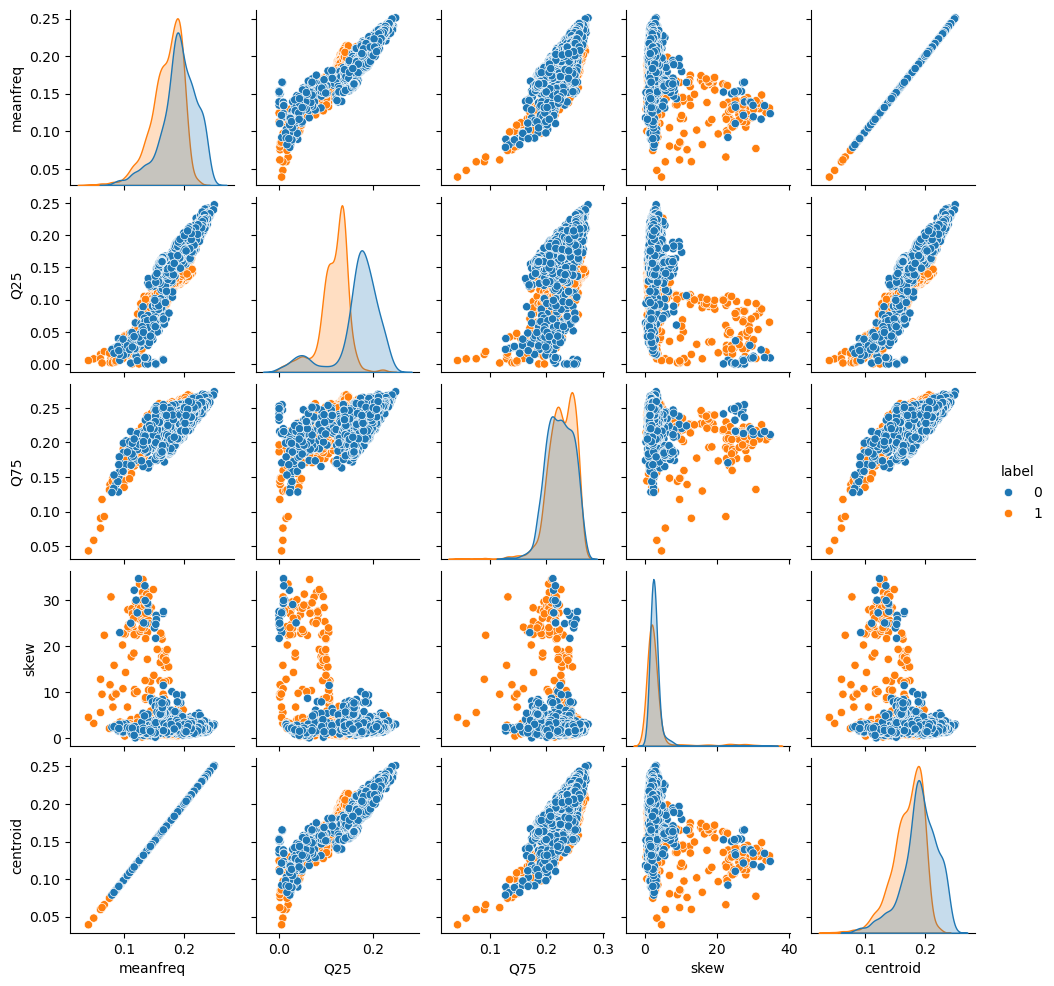

In [17]:
sns.pairplot(data[['meanfreq', 'Q25', 'Q75', 'skew', 'centroid', 'label']], hue='label', size=2)

#### On analysing the above plots we can conclude that we can drop some features due to high correlation or because of not having great diffrence in male and female data sets. These features are sfm,kurt,meandom,meanfreq,dfrange,modindx

In [19]:
new_df = data.drop(columns = ['sfm','kurt','meandom','meanfreq','dfrange','modindx'], axis=1)
new_df.head()

,sd,median,Q25,Q75,IQR,skew,sp.ent,mode,centroid,meanfun,minfun,maxfun,mindom,maxdom,label
0,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,0.893369,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,1
1,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,0.892193,0.000000,0.066009,0.107937,0.015826,0.250000,0.007812,0.054688,1
2,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,0.846389,0.000000,0.077316,0.098706,0.015656,0.271186,0.007812,0.015625,1
3,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,0.963322,0.083878,0.151228,0.088965,0.017798,0.250000,0.007812,0.562500,1
4,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,0.971955,0.104261,0.135120,0.106398,0.016931,0.266667,0.007812,5.484375,1


In [20]:
new_data = dataset.drop(['sfm','kurt','meandom','meanfreq','dfrange','modindx'], axis=1)
new_data.head()

,sd,median,Q25,Q75,IQR,skew,sp.ent,mode,centroid,meanfun,minfun,maxfun,mindom,maxdom,label
0,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,0.893369,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,male
1,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,0.892193,0.000000,0.066009,0.107937,0.015826,0.250000,0.007812,0.054688,male
2,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,0.846389,0.000000,0.077316,0.098706,0.015656,0.271186,0.007812,0.015625,male
3,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,0.963322,0.083878,0.151228,0.088965,0.017798,0.250000,0.007812,0.562500,male
4,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,0.971955,0.104261,0.135120,0.106398,0.016931,0.266667,0.007812,5.484375,male


<Axes: >

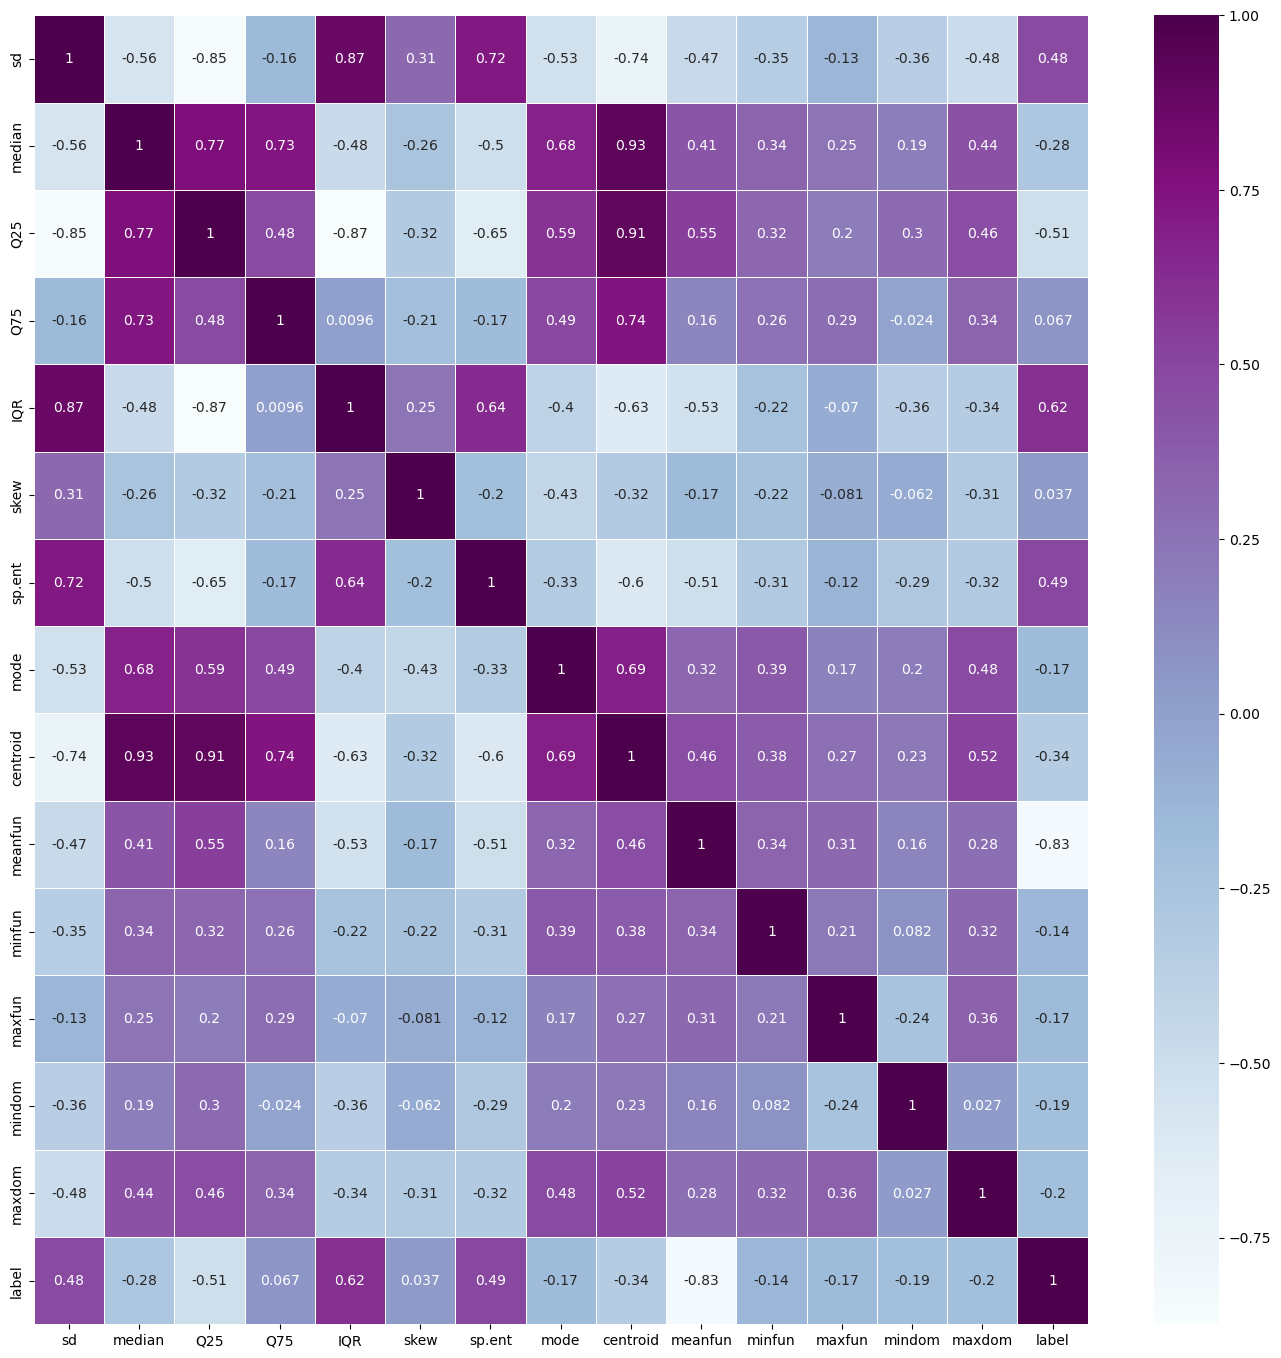

In [21]:
plt.figure(figsize=(17, 17))
sns.heatmap(new_df.corr(), annot=True, cmap='BuPu', linewidth=0.5)

#### Relatively less features have high correlation 

### Train , Test and Split the data using cuml.model_selection

In [24]:
new_data['label'] = new_data['label'].map({'male': 1, 'female' : 0})
new_data.head()

,sd,median,Q25,Q75,IQR,skew,sp.ent,mode,centroid,meanfun,minfun,maxfun,mindom,maxdom,label
0,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,0.893369,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,1
1,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,0.892193,0.000000,0.066009,0.107937,0.015826,0.250000,0.007812,0.054688,1
2,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,0.846389,0.000000,0.077316,0.098706,0.015656,0.271186,0.007812,0.015625,1
3,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,0.963322,0.083878,0.151228,0.088965,0.017798,0.250000,0.007812,0.562500,1
4,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,0.971955,0.104261,0.135120,0.106398,0.016931,0.266667,0.007812,5.484375,1


In [25]:
X = new_data.iloc[ : , : -1].values
Y = new_data.iloc[ : ,  -1].values

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2 , random_state = 42)

In [27]:
X_train.shape

(2534, 14)

In [28]:
Y_train.shape

(2534,)

### Applying different models to see which model gives the highest accuracy 

In [30]:
def print_score(clf, X_train, Y_train, X_test, Y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(Y_train, pred, output_dict = True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(Y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(Y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(Y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(Y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(Y_test, pred)}\n")

### Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
RF_clf = RandomForestClassifier()

In [34]:
n_estimators = 25
max_depth = 10

In [35]:
RF_clf = RandomForestClassifier(max_depth = max_depth, n_estimators = n_estimators, random_state  = 0 )
RF_clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, n_estimators=25, random_state=0)

In [36]:
print_score(RF_clf, X_train, Y_train, X_test, Y_test, train = True)

Train Result:
Accuracy Score: 99.96%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.999224     1.000000  0.999605     0.999612      0.999606
recall        1.000000     0.999198  0.999605     0.999599      0.999605
f1-score      0.999612     0.999599  0.999605     0.999605      0.999605
support    1287.000000  1247.000000  0.999605  2534.000000   2534.000000
_______________________________________________
Confusion Matrix: 
 [[1287    0]
 [   1 1246]]



In [37]:
print_score(RF_clf, X_train, Y_train, X_test, Y_test, train = False)

Test Result:
Accuracy Score: 98.11%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.973422    0.987988  0.981073    0.980705      0.981164
recall       0.986532    0.976261  0.981073    0.981397      0.981073
f1-score     0.979933    0.982090  0.981073    0.981011      0.981079
support    297.000000  337.000000  0.981073  634.000000    634.000000
_______________________________________________
Confusion Matrix: 
 [[293   4]
 [  8 329]]



### Using Support Vector Machines Classifier

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import r2_score

In [40]:
svm_clf = SVC(kernel = 'rbf')
svm_clf.fit(X_train, Y_train)

SVC()

In [41]:
print_score(svm_clf, X_train, Y_train, X_test, Y_test, train = True)

Train Result:
Accuracy Score: 72.30%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.730860     0.715075  0.722968     0.722968      0.723092
recall        0.719503     0.726544  0.722968     0.723023      0.722968
f1-score      0.725137     0.720764  0.722968     0.722950      0.722985
support    1287.000000  1247.000000  0.722968  2534.000000   2534.000000
_______________________________________________
Confusion Matrix: 
 [[926 361]
 [341 906]]



In [42]:
print_score(svm_clf, X_train, Y_train, X_test, Y_test, train = False)

Test Result:
Accuracy Score: 71.45%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.675758    0.756579  0.714511    0.716168      0.718718
recall       0.750842    0.682493  0.714511    0.716667      0.714511
f1-score     0.711324    0.717629  0.714511    0.714476      0.714675
support    297.000000  337.000000  0.714511  634.000000    634.000000
_______________________________________________
Confusion Matrix: 
 [[223  74]
 [107 230]]



### Using KNeighborsCLassifier

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
KN_clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KN_clf.fit(X_train, Y_train)

KNeighborsClassifier()

In [46]:
print_score(KN_clf, X_train, Y_train, X_test, Y_test, train = True)

Train Result:
Accuracy Score: 86.50%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.883212     0.847809  0.865036     0.865511      0.865790
recall        0.846154     0.884523  0.865036     0.865338      0.865036
f1-score      0.864286     0.865777  0.865036     0.865031      0.865020
support    1287.000000  1247.000000  0.865036  2534.000000   2534.000000
_______________________________________________
Confusion Matrix: 
 [[1089  198]
 [ 144 1103]]



In [47]:
print_score(KN_clf, X_train, Y_train, X_test, Y_test, train = False)

Test Result:
Accuracy Score: 75.39%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.726688    0.780186  0.753943    0.753437      0.755125
recall       0.760943    0.747774  0.753943    0.754359      0.753943
f1-score     0.743421    0.763636  0.753943    0.753529      0.754166
support    297.000000  337.000000  0.753943  634.000000    634.000000
_______________________________________________
Confusion Matrix: 
 [[226  71]
 [ 85 252]]



### Using SVC, kernel = Linear

In [49]:
from sklearn.svm import SVC

In [50]:
SVC_clf = SVC(kernel = 'linear')
SVC_clf.fit(X_train, Y_train)

SVC(kernel='linear')

In [51]:
print_score(SVC_clf, X_train, Y_train, X_test, Y_test, train = True)

Train Result:
Accuracy Score: 91.28%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.974199     0.863830  0.912786     0.919015      0.919886
recall        0.850816     0.976744  0.912786     0.913780      0.912786
f1-score      0.908337     0.916823  0.912786     0.912580      0.912513
support    1287.000000  1247.000000  0.912786  2534.000000   2534.000000
_______________________________________________
Confusion Matrix: 
 [[1095  192]
 [  29 1218]]



In [52]:
print_score(SVC_clf, X_train, Y_train, X_test, Y_test, train = False)

Test Result:
Accuracy Score: 93.85%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.984962    0.904891  0.938486    0.944927      0.942401
recall       0.882155    0.988131  0.938486    0.935143      0.938486
f1-score     0.930728    0.944681  0.938486    0.937705      0.938145
support    297.000000  337.000000  0.938486  634.000000    634.000000
_______________________________________________
Confusion Matrix: 
 [[262  35]
 [  4 333]]



### Naive Bayes Classifier

In [54]:
from sklearn.naive_bayes import GaussianNB

In [55]:
NB_clf = GaussianNB()
NB_clf.fit(X_train, Y_train)

GaussianNB()

In [56]:
print_score(NB_clf, X_train, Y_train, X_test, Y_test, train = True)

Train Result:
Accuracy Score: 93.21%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.955846     0.909992  0.932123     0.932919      0.933281
recall        0.908314     0.956696  0.932123     0.932505      0.932123
f1-score      0.931474     0.932760  0.932123     0.932117      0.932107
support    1287.000000  1247.000000  0.932123  2534.000000   2534.000000
_______________________________________________
Confusion Matrix: 
 [[1169  118]
 [  54 1193]]



In [57]:
print_score(NB_clf, X_train, Y_train, X_test, Y_test, train = False)

Test Result:
Accuracy Score: 94.32%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.945392    0.941349  0.943218    0.943371      0.943243
recall       0.932660    0.952522  0.943218    0.942591      0.943218
f1-score     0.938983    0.946903  0.943218    0.942943      0.943193
support    297.000000  337.000000  0.943218  634.000000    634.000000
_______________________________________________
Confusion Matrix: 
 [[277  20]
 [ 16 321]]



### Using Decision Tree Classifier

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
DT_clf = DecisionTreeClassifier(criterion  = 'entropy')
DT_clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [61]:
print_score(DT_clf, X_train, Y_train, X_test, Y_test, train = True)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    1287.0  1247.0       1.0     2534.0        2534.0
_______________________________________________
Confusion Matrix: 
 [[1287    0]
 [   0 1247]]



In [62]:
print_score(DT_clf, X_train, Y_train, X_test, Y_test, train = False)

Test Result:
Accuracy Score: 96.21%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.941748    0.981538  0.962145    0.961643      0.962898
recall       0.979798    0.946588  0.962145    0.963193      0.962145
f1-score     0.960396    0.963746  0.962145    0.962071      0.962177
support    297.000000  337.000000  0.962145  634.000000    634.000000
_______________________________________________
Confusion Matrix: 
 [[291   6]
 [ 18 319]]



### XGBoost Classifier

In [64]:
from xgboost import XGBClassifier

In [65]:
XGB_clf = XGBClassifier(learning_rate = 0.1, n_estimators = 1000, max_depth = 5, min_child_weight = 1, gamma = 0,
                     subsample = 0.8, colsample_bytree = 0.8, objective = 'binary:logistic', nthread = 4, 
                     scale_pos_weight = 1, seed = 27)

In [66]:
XGB_clf.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None, nthread=4,
              num_parallel_tree=None, ...)

In [67]:
print_score(XGB_clf, X_train, Y_train, X_test, Y_test, train = True)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    1287.0  1247.0       1.0     2534.0        2534.0
_______________________________________________
Confusion Matrix: 
 [[1287    0]
 [   0 1247]]



In [68]:
print_score(XGB_clf, X_train, Y_train, X_test, Y_test, train = False)

Test Result:
Accuracy Score: 98.58%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.976821    0.993976  0.985804    0.985399      0.985940
recall       0.993266    0.979228  0.985804    0.986247      0.985804
f1-score     0.984975    0.986547  0.985804    0.985761      0.985811
support    297.000000  337.000000  0.985804  634.000000    634.000000
_______________________________________________
Confusion Matrix: 
 [[295   2]
 [  7 330]]



### Voice Based Gender Classification using Tensorflow

In [70]:
X = data.drop(columns = ["label"], axis = 1)
Y = data.label.values

In [71]:
X = (X - X.min()) / (X.max() - X.min())

print(X.shape)
print(Y.shape)

(3168, 20)
(3168,)


In [72]:
X_train_nn, X_test_nn, Y_train_nn, Y_test_nn = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [73]:
Y_train_nn = Y_train.reshape(-1,1)
Y_test_nn = Y_test.reshape(-1,1)

In [74]:
print(X_train_nn.shape)
print(Y_train_nn.shape)
print(X_test_nn.shape)
print(Y_test_nn.shape)

(2534, 20)
(2534, 1)
(634, 20)
(634, 1)


Importing tensorflow

In [76]:
import tensorflow
import tensorflow.keras as keras 

Building a simple Multilayer NN for Classification with Tensorflow

In [78]:
model = keras.Sequential([keras.layers.InputLayer(input_shape = X_train.shape[1:]),
                          keras.layers.Dense(32, activation = 'relu'),
                          keras.layers.Dense(64, activation = 'relu'),
                          keras.layers.Dropout(0.2),
                          keras.layers.Dense(32, activation = 'relu'),
                          keras.layers.Dropout(0.2),
                          keras.layers.Dense(16, activation = 'relu'),
                          keras.layers.Dense(1, activation = 'sigmoid')
                         ])

In [79]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,217 (20.38 KB)

 Trainable params: 5,217 (20.38 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Setting the Hyper Parameters

In [82]:
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor=0.2, patience = 5, min_lr = 0.001)

Fitting the model

In [84]:
history = model.fit(X_train, Y_train, validation_split = 0.2 , epochs = 50, callbacks = [reduce_lr])

Epoch 1/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5365 - loss: 0.6935 - val_accuracy: 0.5345 - val_loss: 0.6778 - learning_rate: 0.0010
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.5316 - loss: 0.6846 - val_accuracy: 0.5325 - val_loss: 0.6635 - learning_rate: 0.0010
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.5619 - loss: 0.6693 - val_accuracy: 0.7041 - val_loss: 0.6266 - learning_rate: 0.0010
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.6101 - loss: 0.6496 - val_accuracy: 0.6252 - val_loss: 0.6013 - learning_rate: 0.0010
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.6684 - loss: 0.6130 - val_accuracy: 0.7594 - val_loss: 0.5293 - learning_rate: 0.0010
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7073 - loss: 0.5665 - val_accuracy: 0.8028 - val_loss: 0.4840 - learning_rate: 0.0010
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - accuracy: 0.7563 - loss: 0.5310 - val_

Visualizing the Model's Performance 

In [86]:
history_df = pd.DataFrame(history.history)
history_df.head()

,accuracy,loss,val_accuracy,val_loss,learning_rate
0,0.526394,0.689879,0.534517,0.677820,0.001
1,0.535767,0.680355,0.532544,0.663535,0.001
2,0.583621,0.664300,0.704142,0.626633,0.001
3,0.638382,0.634478,0.625247,0.601261,0.001
4,0.679329,0.602355,0.759369,0.529262,0.001


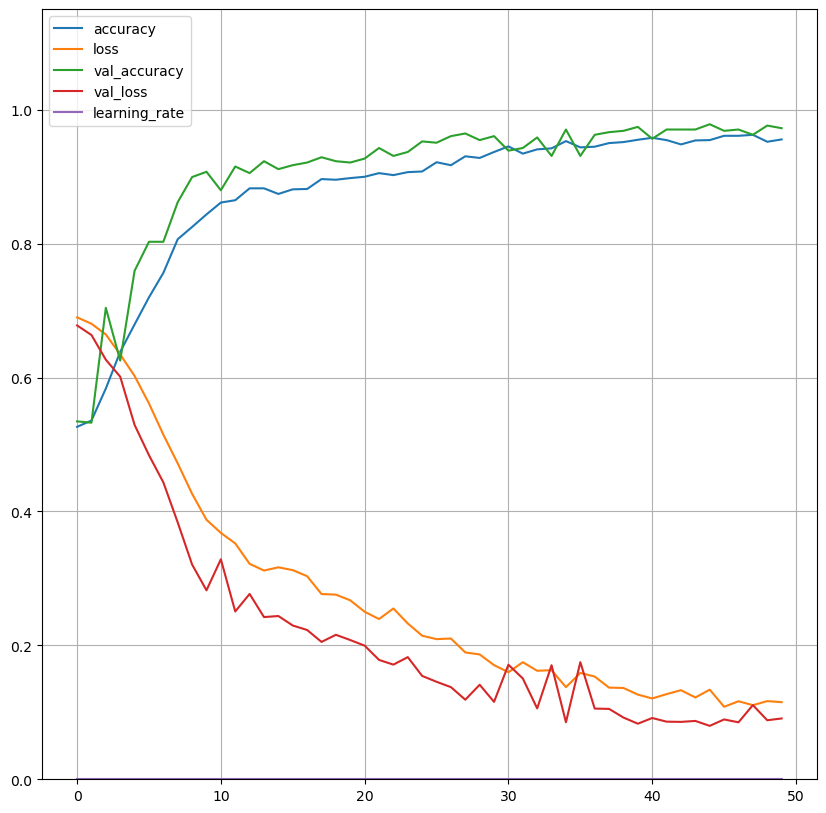

In [87]:
history_df.plot(figsize = (10, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1.15)
plt.show()

### Essential Testing Functions

In [89]:
X_test = pd.DataFrame(X_test)

In [90]:
def Essential_data(testing_data):
    testing_data =  testing_data[['sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'sp.ent', 'mode', 'centroid',
                                  'meanfun', 'minfun', 'maxfun', 'mindom', 'maxdom']]
    return testing_data

In [91]:
def Testing_Voice(testing_data):
    test = testing_data.iloc[0]
    testing_array = np.asarray(test)
    testing_array = testing_array.reshape(1,-1)
    prediction = XGB_clf.predict(testing_array)

    if (prediction[0] == 1):
        print("Male Voice")
    else:
        print("Female Voice")

### Checking For Male Data

In [93]:
male_data = pd.read_csv('/Users/mrityunjay/Downloads/Identifying male or female based on voice using XGBoost and ML/male_voice.csv')
male_data

,Unnamed: 0,sound.files,selec,duration,meanfreq,sd,median,Q25,Q75,IQR,...,centroid,peakf,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,1,brian.wav,0,20,0.181215,0.059455,0.176778,0.140711,0.229811,0.0891,...,0.181215,0,0.137074,0.043278,0.279114,1.036896,0,4.155908,4.155908,0.130956


In [94]:
male_data = Essential_data(male_data)
male_data

,sd,median,Q25,Q75,IQR,skew,sp.ent,mode,centroid,meanfun,minfun,maxfun,mindom,maxdom
0,0.059455,0.176778,0.140711,0.229811,0.0891,1.547385,0.945979,0.277866,0.181215,0.137074,0.043278,0.279114,0,4.155908


In [95]:
Testing_Voice(male_data)

Male Voice


### Checking for Female Data

In [97]:
female_data = pd.read_csv('/Users/mrityunjay/Downloads/Identifying male or female based on voice using XGBoost and ML/female_voice.csv')
female_data

,Unnamed: 0,sound.files,selec,duration,meanfreq,sd,median,Q25,Q75,IQR,...,centroid,peakf,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,1,amy.wav,0,20,0.183064,0.046934,0.183643,0.156127,0.212469,0.056343,...,0.183064,0,0.154861,0.043278,0.275625,0.990816,0,7.170557,7.170557,0.102383


In [98]:
female_data = Essential_data(female_data)
female_data

,sd,median,Q25,Q75,IQR,skew,sp.ent,mode,centroid,meanfun,minfun,maxfun,mindom,maxdom
0,0.046934,0.183643,0.156127,0.212469,0.056343,1.520555,0.92146,0.160562,0.183064,0.154861,0.043278,0.275625,0,7.170557


In [99]:
Testing_Voice(female_data)

Female Voice
